<a href="https://colab.research.google.com/github/Marchosh/NFL-Prediction-2022/blob/main/NFL_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Marchosh/NFL-Prediction-2022/main/Data/nflcombine2.csv')
df.head()

,Unnamed: 0,Unnamed: 5,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,...,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Home_team,Year,Winner
0,0,W,Tampa Bay Buccaneers,31.0,17.0,17.0,256.0,158.0,98.0,2.0,...,295.0,174.0,121.0,4.0,-7.51,19.12,1.10,San Francisco 49ers,2019,San Francisco 49ers
1,1,W,Cincinnati Bengals,41.0,17.0,27.0,571.0,312.0,259.0,1.0,...,316.0,291.0,25.0,1.0,27.34,1.14,-6.64,San Francisco 49ers,2019,San Francisco 49ers
2,2,W,Pittsburgh Steelers,24.0,20.0,26.0,436.0,268.0,168.0,5.0,...,239.0,160.0,79.0,2.0,-3.72,10.20,0.12,San Francisco 49ers,2019,San Francisco 49ers
3,3,W,Los Angeles Rams,20.0,7.0,22.0,331.0,232.0,99.0,2.0,...,157.0,48.0,109.0,1.0,-3.54,25.23,-5.01,San Francisco 49ers,2019,San Francisco 49ers
4,4,W,Washington Redskins,9.0,0.0,17.0,283.0,146.0,137.0,1.0,...,154.0,50.0,104.0,1.0,-1.99,14.12,-0.61,San Francisco 49ers,2019,San Francisco 49ers


In [ ]:
df['Opp'].unique()

array(['Tampa Bay Buccaneers', 'Cincinnati Bengals',
       'Pittsburgh Steelers', 'Los Angeles Rams', 'Washington Redskins',
       'Carolina Panthers', 'Seattle Seahawks', 'Arizona Cardinals',
       'Baltimore Ravens', 'New Orleans Saints', 'Atlanta Falcons',
       'Minnesota Vikings', 'Kansas City Chiefs', 'Oakland Raiders',
       'Los Angeles Chargers', 'New York Giants', 'Detroit Lions',
       'San Francisco 49ers', 'Buffalo Bills', 'Cleveland Browns',
       'Miami Dolphins', 'Tennessee Titans', 'Houston Texans',
       'New York Jets', 'Jacksonville Jaguars', 'Indianapolis Colts',
       'New England Patriots', 'Philadelphia Eagles', 'Denver Broncos',
       'Chicago Bears', 'Dallas Cowboys', 'Green Bay Packers',
       'Washington Football Team', 'Las Vegas Raiders',
       'Washington Commanders'], dtype=object)

In [ ]:
df.drop(['Unnamed: 0','Winner'], axis = 1, inplace=True)
df.head()

,Unnamed: 5,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Home_team,Year
0,W,Tampa Bay Buccaneers,31.0,17.0,17.0,256.0,158.0,98.0,2.0,21.0,295.0,174.0,121.0,4.0,-7.51,19.12,1.10,San Francisco 49ers,2019
1,W,Cincinnati Bengals,41.0,17.0,27.0,571.0,312.0,259.0,1.0,14.0,316.0,291.0,25.0,1.0,27.34,1.14,-6.64,San Francisco 49ers,2019
2,W,Pittsburgh Steelers,24.0,20.0,26.0,436.0,268.0,168.0,5.0,11.0,239.0,160.0,79.0,2.0,-3.72,10.20,0.12,San Francisco 49ers,2019
3,W,Los Angeles Rams,20.0,7.0,22.0,331.0,232.0,99.0,2.0,10.0,157.0,48.0,109.0,1.0,-3.54,25.23,-5.01,San Francisco 49ers,2019
4,W,Washington Redskins,9.0,0.0,17.0,283.0,146.0,137.0,1.0,10.0,154.0,50.0,104.0,1.0,-1.99,14.12,-0.61,San Francisco 49ers,2019


In [ ]:
df['Year']

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
890    2022
891    2022
892    2022
893    2022
894    2022
Name: Year, Length: 895, dtype: int64

In [ ]:
df.drop('Year', axis = 1, inplace=True)

#Preprocess Data

In [ ]:
df_pre = df

In [ ]:
df_pre.head(5)

,Unnamed: 5,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Home_team
0,W,Tampa Bay Buccaneers,31.0,17.0,17.0,256.0,158.0,98.0,2.0,21.0,295.0,174.0,121.0,4.0,-7.51,19.12,1.10,San Francisco 49ers
1,W,Cincinnati Bengals,41.0,17.0,27.0,571.0,312.0,259.0,1.0,14.0,316.0,291.0,25.0,1.0,27.34,1.14,-6.64,San Francisco 49ers
2,W,Pittsburgh Steelers,24.0,20.0,26.0,436.0,268.0,168.0,5.0,11.0,239.0,160.0,79.0,2.0,-3.72,10.20,0.12,San Francisco 49ers
3,W,Los Angeles Rams,20.0,7.0,22.0,331.0,232.0,99.0,2.0,10.0,157.0,48.0,109.0,1.0,-3.54,25.23,-5.01,San Francisco 49ers
4,W,Washington Redskins,9.0,0.0,17.0,283.0,146.0,137.0,1.0,10.0,154.0,50.0,104.0,1.0,-1.99,14.12,-0.61,San Francisco 49ers


##Categorical Variable

In [ ]:
from sklearn import preprocessing

# prepare target
def Converto_num(y):
	le = preprocessing.LabelEncoder()
	le.fit(y)
	y_new = le.transform(y)
	return y_new

In [ ]:
# df_pre['Opp'] = Converto_num(df_pre['Opp'])
# df_pre['Home_team'] = Converto_num(df_pre['Home_team'])
df_pre['Unnamed: 5'] = Converto_num(df_pre['Unnamed: 5'])
# #df_pre['Winner'] = Converto_num(df_pre['Winner'])

In [ ]:
#COnver to dummy
df_pre = pd.get_dummies(df_pre, columns=['Opp','Home_team'])

In [ ]:
df_pre.head()

,Unnamed: 5,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,...,Home_team_New Orleans Saints,Home_team_New York Giants,Home_team_New York Jets,Home_team_Oakland Raiders,Home_team_Philadelphia Eagles,Home_team_Pittsburgh Steelers,Home_team_San Francisco 49ers,Home_team_Seattle Seahawks,Home_team_Tampa Bay Buccaneers,Home_team_Tennessee Titans
0,2,31.0,17.0,17.0,256.0,158.0,98.0,2.0,21.0,295.0,...,0,0,0,0,0,0,1,0,0,0
1,2,41.0,17.0,27.0,571.0,312.0,259.0,1.0,14.0,316.0,...,0,0,0,0,0,0,1,0,0,0
2,2,24.0,20.0,26.0,436.0,268.0,168.0,5.0,11.0,239.0,...,0,0,0,0,0,0,1,0,0,0
3,2,20.0,7.0,22.0,331.0,232.0,99.0,2.0,10.0,157.0,...,0,0,0,0,0,0,1,0,0,0
4,2,9.0,0.0,17.0,283.0,146.0,137.0,1.0,10.0,154.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df_pre.columns

Index(['Unnamed: 5', 'Tm', 'Opp.1', '1stD', 'TotYd', 'PassY', 'RushY', 'TO',
       '1stD.1', 'TotYd.1', 'PassY.1', 'RushY.1', 'TO.1', 'Offense', 'Defense',
       'Sp. Tms', 'Opp_Arizona Cardinals', 'Opp_Atlanta Falcons',
       'Opp_Baltimore Ravens', 'Opp_Buffalo Bills', 'Opp_Carolina Panthers',
       'Opp_Chicago Bears', 'Opp_Cincinnati Bengals', 'Opp_Cleveland Browns',
       'Opp_Dallas Cowboys', 'Opp_Denver Broncos', 'Opp_Detroit Lions',
       'Opp_Green Bay Packers', 'Opp_Houston Texans', 'Opp_Indianapolis Colts',
       'Opp_Jacksonville Jaguars', 'Opp_Kansas City Chiefs',
       'Opp_Las Vegas Raiders', 'Opp_Los Angeles Chargers',
       'Opp_Los Angeles Rams', 'Opp_Miami Dolphins', 'Opp_Minnesota Vikings',
       'Opp_New England Patriots', 'Opp_New Orleans Saints',
       'Opp_New York Giants', 'Opp_New York Jets', 'Opp_Oakland Raiders',
       'Opp_Philadelphia Eagles', 'Opp_Pittsburgh Steelers',
       'Opp_San Francisco 49ers', 'Opp_Seattle Seahawks',
       'Opp_Tampa

##Standarization

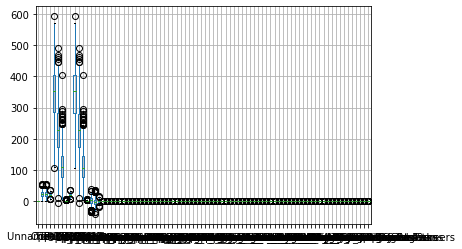

In [ ]:
boxplot = df_pre.boxplot()
#contain outlier

##Split Data

In [ ]:
from sklearn.model_selection import train_test_split
y = df_pre['Unnamed: 5']
x = df_pre.drop('Unnamed: 5', axis=1)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

print(f"x_train: {x_train.shape[0]}")
print(f"x_test: {x_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

x_train: 716
x_test: 179
y_train: 716
y_test: 179


###RobustScaller

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(x_train, y_train)
X_train_scaled.shape

(716, 81)

In [ ]:
scaler.n_features_in_

81

In [ ]:

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=x_train.columns)
X_train_scaled_df.describe()

,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,...,Home_team_New Orleans Saints,Home_team_New York Giants,Home_team_New York Jets,Home_team_Oakland Raiders,Home_team_Philadelphia Eagles,Home_team_Pittsburgh Steelers,Home_team_San Francisco 49ers,Home_team_Seattle Seahawks,Home_team_Tampa Bay Buccaneers,Home_team_Tennessee Titans
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,...,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000
mean,0.021809,0.010529,-0.062650,-0.038763,0.028461,0.082829,-0.208101,-0.079609,-0.047196,0.018963,...,0.029330,0.030726,0.033520,0.020950,0.030726,0.034916,0.040503,0.036313,0.044693,0.026536
std,0.754103,0.774541,0.710546,0.716659,0.764566,0.764347,0.993681,0.720446,0.719592,0.759448,...,0.168847,0.172696,0.180115,0.143316,0.172696,0.183696,0.197273,0.187198,0.206773,0.160836
min,-1.769231,-1.769231,-2.142857,-2.067797,-2.276029,-1.630189,-1.000000,-2.142857,-2.016598,-2.223278,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.461538,-0.461538,-0.571429,-0.550847,-0.503632,-0.498113,-1.000000,-0.571429,-0.582988,-0.513064,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.538462,0.538462,0.428571,0.449153,0.496368,0.501887,0.000000,0.428571,0.417012,0.486936,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.538462,2.461538,2.142857,2.025424,2.527845,2.762264,5.000000,2.142857,1.991701,2.489311,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train_scaled_df.dtypes

Tm                                float64
Opp.1                             float64
1stD                              float64
TotYd                             float64
PassY                             float64
                                   ...   
Home_team_Pittsburgh Steelers     float64
Home_team_San Francisco 49ers     float64
Home_team_Seattle Seahawks        float64
Home_team_Tampa Bay Buccaneers    float64
Home_team_Tennessee Titans        float64
Length: 81, dtype: object

In [ ]:
X_test_scaled = scaler.transform(x_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=x_test.columns)
X_test_scaled_df.describe()

,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,...,Home_team_New Orleans Saints,Home_team_New York Giants,Home_team_New York Jets,Home_team_Oakland Raiders,Home_team_Philadelphia Eagles,Home_team_Pittsburgh Steelers,Home_team_San Francisco 49ers,Home_team_Seattle Seahawks,Home_team_Tampa Bay Buccaneers,Home_team_Tennessee Titans
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,...,179.000000,179.000000,179.000000,179.000000,179.00000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,-0.000430,-0.031371,-0.105347,-0.054777,0.023212,0.062486,-0.301676,-0.069433,-0.051322,0.045489,...,0.033520,0.044693,0.039106,0.033520,0.01676,0.050279,0.027933,0.033520,0.033520,0.033520
std,0.775793,0.704758,0.720094,0.772455,0.781565,0.850307,1.026912,0.717546,0.696332,0.742174,...,0.180494,0.207208,0.194391,0.180494,0.12873,0.219134,0.165243,0.180494,0.180494,0.180494
min,-1.769231,-1.769231,-2.142857,-2.101695,-1.753027,-1.237736,-1.000000,-2.142857,-2.049793,-1.710214,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.461538,-0.538462,-0.571429,-0.656780,-0.532688,-0.520755,-1.000000,-0.571429,-0.502075,-0.498812,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-0.076923,0.000000,0.025424,0.009685,-0.120755,-1.000000,0.000000,0.024896,0.019002,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.538462,0.461538,0.285714,0.432203,0.547215,0.573585,0.000000,0.428571,0.464730,0.617577,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.153846,2.538462,1.571429,1.847458,2.092010,4.422642,5.000000,2.000000,1.659751,1.938242,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_train.head()

367    2
808    2
870    2
221    2
537    2
Name: Unnamed: 5, dtype: int64

#Model Budiling

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(81, input_shape=(81,), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

##Hyperparameter Tuning

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [ ]:
# Create function
def nn_cl_bo(neurons, activation, optimizer, learning_rate,  batch_size, epochs ):
    optimizerL = ['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl','SGD']
    optimizerD= {'Adam':Adam(lr=learning_rate), 'SGD':SGD(lr=learning_rate),
                 'RMSprop':RMSprop(lr=learning_rate), 'Adadelta':Adadelta(lr=learning_rate),
                 'Adagrad':Adagrad(lr=learning_rate), 'Adamax':Adamax(lr=learning_rate),
                 'Nadam':Nadam(lr=learning_rate), 'Ftrl':Ftrl(lr=learning_rate)}
    activationL = ['relu', 'sigmoid', 'softplus', 'softsign', 'tanh', 'selu',
                   'elu', 'exponential', LeakyReLU,'relu']
    neurons = round(neurons)
    activation = activationL[round(activation)]
    batch_size = round(batch_size)
    epochs = round(epochs)
    def nn_cl_fun():
        opt = Adam(lr = learning_rate)
        nn = Sequential()
        nn.add(Dense(neurons, input_dim=10, activation=activation))
        nn.add(Dense(neurons, activation=activation))
        nn.add(Dense(1, activation='sigmoid'))
        nn.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
        return nn
    es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
    nn = KerasClassifier(build_fn=nn_cl_fun, epochs=epochs, batch_size=batch_size,
                         verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    score = cross_val_score(nn, X_train, y_train, scoring=score_acc, cv=kfold, fit_params={'callbacks':[es]}).mean()
    return score

#Fitting the Model

In [ ]:
# fit the keras model on the dataset
model.fit(X_train_scaled_df, y_train, epochs=100, batch_size=10)

Epoch 1/100
72/72 [==============================] - 1s 3ms/step - loss: -1.5428 - accuracy: 0.1299
Epoch 2/100
72/72 [==============================] - 0s 6ms/step - loss: -26.1806 - accuracy: 0.2332
Epoch 3/100
72/72 [==============================] - 0s 3ms/step - loss: -155.9779 - accuracy: 0.2514
Epoch 4/100
72/72 [==============================] - 0s 2ms/step - loss: -522.0558 - accuracy: 0.2807
Epoch 5/100
72/72 [==============================] - 0s 2ms/step - loss: -1234.6858 - accuracy: 0.2849
Epoch 6/100
72/72 [==============================] - 0s 2ms/step - loss: -2413.1750 - accuracy: 0.2947
Epoch 7/100
72/72 [==============================] - 0s 3ms/step - loss: -4171.6060 - accuracy: 0.3017
Epoch 8/100
72/72 [==============================] - 0s 2ms/step - loss: -6552.7627 - accuracy: 0.2989
Epoch 9/100
72/72 [==============================] - 0s 2ms/step - loss: -9654.1338 - accuracy: 0.3017
Epoch 10/100
72/72 [==============================] - 0s 2ms/step - loss: -13562

#Evalutaion

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X_train_scaled_df, y_train)
print('Accuracy: %.2f' % (accuracy*100))

23/23 [==============================] - 0s 2ms/step - loss: -7393071.0000 - accuracy: 0.3045
Accuracy: 30.45
